<h1>IBM Advance Data Science Capstone Project </h1>

In this capstone project, My aim is to explore breast cancer dataset. The features of the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. <br>
<b>This data analysis is useful to predict the breast cancer cells in human body.</b>

<h2>Import Required Libraries</h2>

In [19]:
# import data wrangling and visual libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

# to check the dircteory
import os
print(os.listdir("../Data"))

<h2>Loading Data</h2>

In [67]:
# Read Field Names File and Show Top 2 Records
with open('../Data/field_names.txt', 'r') as the_file:
    col_names = [line.strip() for line in the_file.readlines()]
print(col_names, '\n')

# Read Data File and Show Top 2 Records
data = pd.read_csv("../Data/breast-cancer.csv",header=None)
print(data.head(2))

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst'] 

       0  1      2      3      4       5        6        7       8        9   \
0  842302  M  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001  0.14710   
1  842517  M  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869  0.07017   

    ...        22     23     24      25      26      27      28      29  \
0   ...     25.38  17.33  184.6  2019.0  0.1622  0.6656  

In [68]:
# set Column Names and display top 3 records
data.columns = col_names
print(data.head(3))  
# to see last 3 records
print(data.tail(3))  

         ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0    842302         M        17.99            10.38         122.8   
1    842517         M        20.57            17.77         132.9   
2  84300903         M        19.69            21.25         130.0   

   texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0        1001.0           0.11840        0.27760          0.3001   
1        1326.0           0.08474        0.07864          0.0869   
2        1203.0           0.10960        0.15990          0.1974   

   perimeter_sd_error           ...             concavity_worst  \
0             0.14710           ...                       25.38   
1             0.07017           ...                       24.99   
2             0.12790           ...                       23.57   

   concave_points_mean  concave_points_sd_error  concave_points_worst  \
0                17.33                    184.6                2019.0   
1                23.41             

<h1> Data Wrangling </h1>

We have successfully loaded data. Now lets look at the type of data we have.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

So we have 569 records against 32 columns and all of them have 569 non-null records and the data type is float64.

Lets keep the Diagnosis data and drop ID and diagnosis columns as they are not needed

In [57]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['ID','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

Remaining features are representing the 3 computations (Mean, Standard Deviation Error and Worst) against single feautre.
Lets group them into 3 categories.

In [84]:
#list of column names that match with Mean
mean_cols = [col for col in x.columns if '_mean' in col]
print(mean_cols,'\n')

#list of column names that match with SD
sd_cols = [col for col in x.columns if '_sd' in col]
print(mean_cols, '\n')

#list of column names that match with Mean
worst_cols = [col for col in x.columns if '_worst' in col]
print(mean_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


Before moving forward to the data analysis of features. Lets have a quick look of the labels we are going to predict

Number of Benign:  357
Number of Malignant :  212


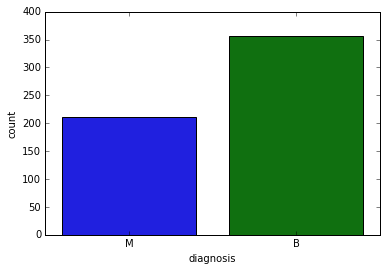

In [71]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

So far, we are unfimilar with the data and its features, and what they are representing. In real world, we come acroos to many different problems where we don't know the meanining of features but to imagine in our minds. What we must know is the distribution of data like <b>variance, standart deviation, number of sample (count) or max min values</b>. These type of information helps to understand the data, how normally distributed it is, or it has skewed distribution.

In [85]:
x.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The summary statistics helps us to understand is we need standirdization or normalization before visualization, feature selection or classificaiton.

Before moving to Exploratory Analysis, lets develop a function to generate bootstrap samples.

In [161]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])
    return X_resample


In [181]:
# Create new df variable for resampled data
df_resampled = pd.DataFrame(index=df.index, columns=df.columns, dtype=df.dtypes)
for col in x.columns:
    df_resampled[col] = bootstrap_resample(x[col])

# original data
x.ix[:50,:50]

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [182]:
#sample data
df_resampled.ix[:50,:50]

,concavity_worst,concave_points_worst,radius_worst,radius_mean,radius_sd_error,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_mean,concavity_sd_error,concave_points_mean,concave_points_sd_error,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,17.580,1233.0,75.21,18.810,23.04,651.9,0.10990,0.05131,0.177200,0.011170,...,0.022100,0.005667,22.75,69.92,0.11840,0.23270,0.243200,0.08296,0.2590,0.06287
1,24.560,1479.0,143.70,12.320,10.89,420.3,0.11220,0.07112,0.137900,0.000000,...,0.020450,0.001787,38.30,82.08,0.15150,0.16520,0.292300,0.13790,0.2889,0.07397
2,12.360,331.6,97.03,11.930,15.79,408.2,0.07966,0.10530,0.017650,0.025630,...,0.026690,0.001435,22.65,251.20,0.12560,0.28670,0.264400,0.14790,0.2463,0.06603
3,16.510,471.4,130.70,9.567,17.68,378.2,0.09714,0.10380,0.090610,0.095610,...,0.019800,0.003042,14.82,86.12,0.13240,0.32990,0.184800,0.22290,0.2928,0.07685
4,13.030,567.7,87.32,13.660,18.59,324.9,0.10490,0.06779,0.300100,0.017960,...,0.021240,0.001532,39.42,101.70,0.11620,0.08842,0.358200,0.20950,0.2593,0.08183
5,17.380,973.1,125.50,16.030,16.83,1878.0,0.12370,0.04689,0.059280,0.114900,...,0.022580,0.001976,25.46,81.39,0.11620,0.19650,0.300900,0.10010,0.3000,0.10710
6,12.780,474.2,78.04,19.730,27.08,992.1,0.11860,0.07504,0.071350,0.110300,...,0.013290,0.002472,25.45,107.40,0.12170,0.07622,0.139700,0.24750,0.2233,0.07007
7,14.400,939.7,76.83,9.755,16.85,1214.0,0.08974,0.05581,0.070700,0.011410,...,0.016890,0.021930,28.26,166.80,0.15840,0.06624,0.192700,0.07283,0.2143,0.09952
8,14.990,614.9,103.70,19.160,39.28,221.2,0.08223,0.11590,0.112600,0.070170,...,0.017780,0.002788,16.51,148.70,0.13350,0.22640,0.259600,0.18270,0.2364,0.12430
9,25.700,2232.0,66.20,8.888,14.78,1311.0,0.09989,0.13360,0.231000,0.020700,...,0.023090,0.005953,40.54,180.20,0.16000,0.18510,0.155300,0.08829,0.2790,0.07330


In [192]:
print("\n radius_mean of Original & Sampled dataset")
x.radius_mean.mean(), df_resampled.radius_mean.mean()


 radius_mean of Original & Sampled dataset


(14.127291739894563, 14.144697715289995)

<h1> Visualization

For data visualization, we are going to use seaborn plots. 
Violin and Swarm plots usually helps us to understand data easily.

First, we need to perform normalization/standirdization of data. Because differences between values of features are very high to observe in plot

In [95]:
data = x
data_nor= (data - data.mean()) / (data.std())   # standardization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

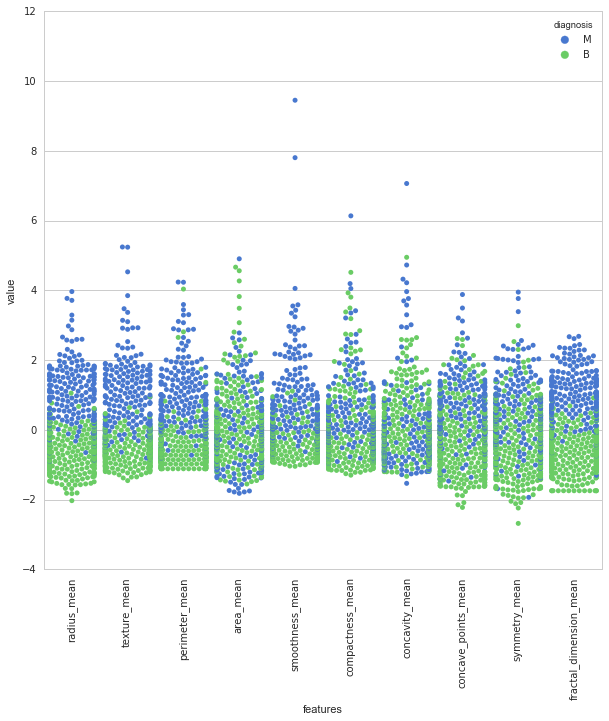

In [118]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_nor[mean_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
import time
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

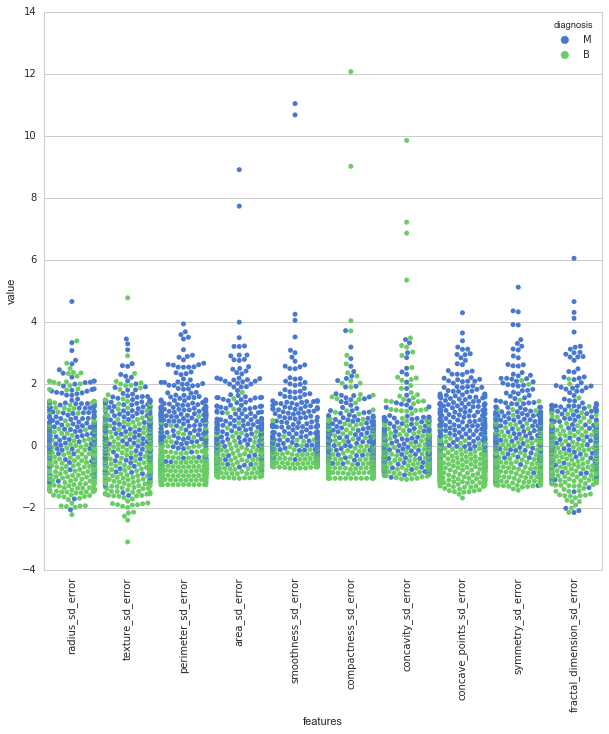

In [119]:
data = pd.concat([y,data_nor[sd_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  132.68085765838623  s


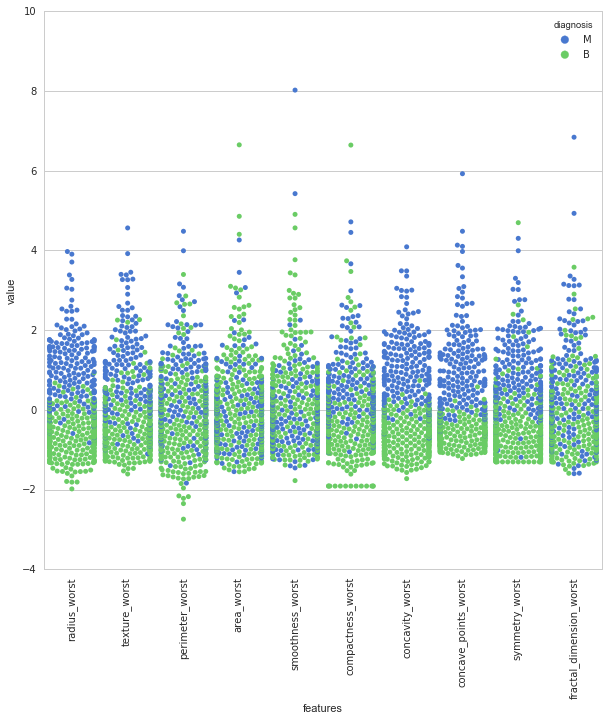

In [122]:
data = pd.concat([y,data_nor[worst_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

<b>3 Plots Explanation: </b>
In the above three graphs, we can see variance more clearly. Let me ask you a question, in these three plots which feature looks like more evident in terms of classification? 
In my opinion concavity_worst in last swarm plot malignant and benign looks separately, not totaly but mostly. Hovewer, area_mean, area_sd_error and area_worst all three looks like malignant and benign are mixed so it is hard to classify by using this feature.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

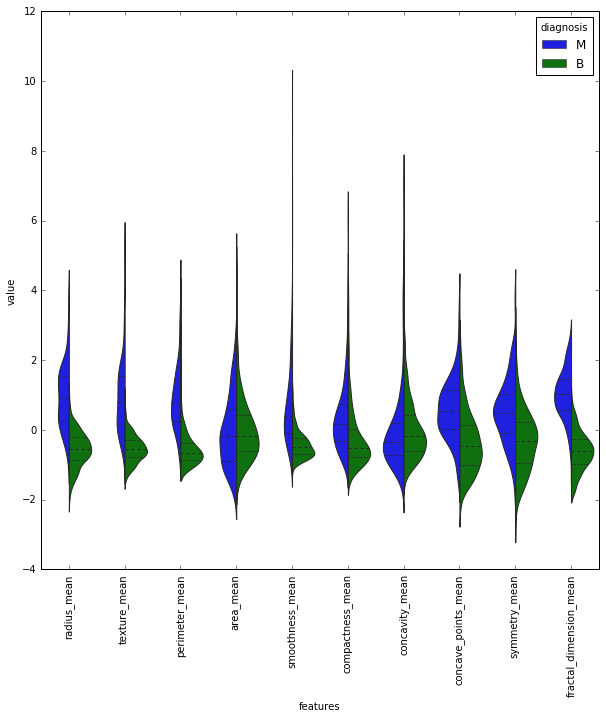

In [96]:
# All mean features
data_diag = y        
data = pd.concat([y,data_nor[mean_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<b>Plot Explanation:</b>
In texture_mean, perimeter_mean, concave_points_mean and symetry_mean features, median of the Malignant and Benign looks like separated so it can be good for classification. However, in area_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

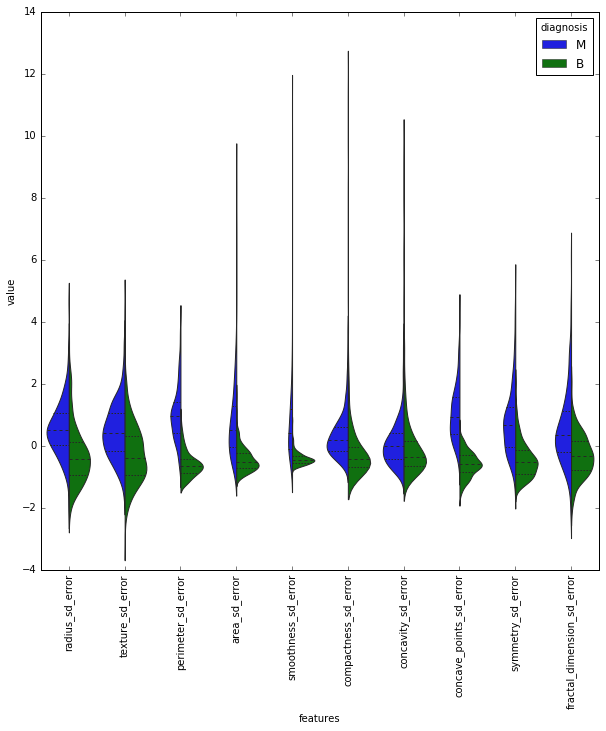

In [97]:
data = pd.concat([y,data_nor[sd_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

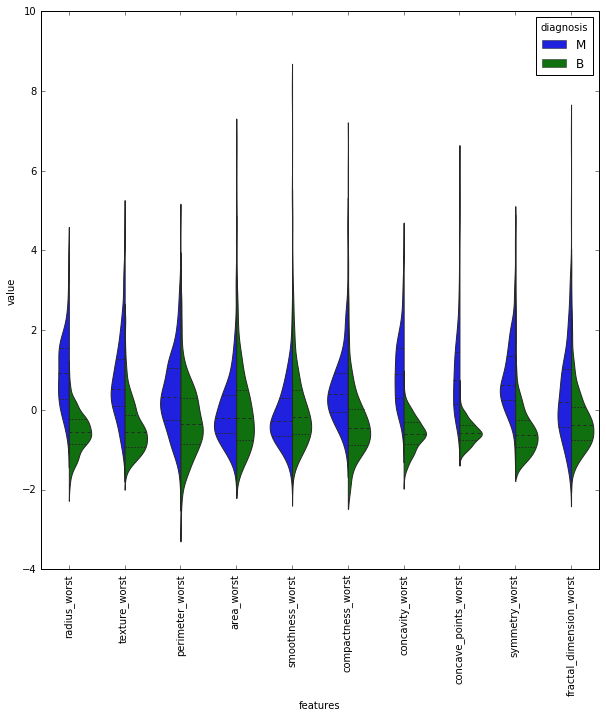

In [98]:
data = pd.concat([y,data_nor[worst_cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<b>Plot Explanation:</b>
Lets interpret one more thing about plot above, variable of concavity_worst and concave_points_worst looks similar but how can we decide whether they are correlated with each other or not. It can not always be true but, if the features are correlated with each other then we can drop one of them.

In order to compare two features deeper, lets use joint plot. In the joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.82 is looks enough to say that they are correlated.

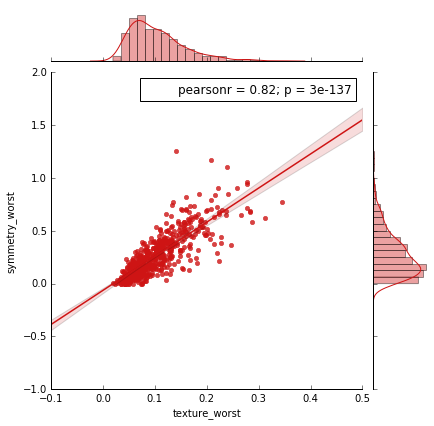

In [102]:
sns.jointplot(x.loc[:,'texture_worst'], x.loc[:,'symmetry_worst'], kind="regg", color="#ce1414")

In last violin plot, concavity_worst, concave_points_worst, and radius_worst also looks similar.  Let's plot the pair grid plot to see if they are correlated.

C:\Users\sana.rasheed\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\sana.rasheed\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\sana.rasheed\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


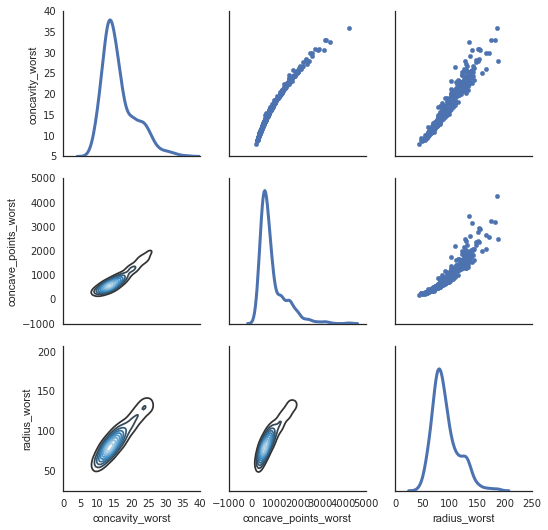

In [107]:
sns.set(style="white")
df = x.loc[:,['concavity_worst','concave_points_worst','radius_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In above graph, we can observe that all three features are correlated.

Lets observe the correlation between all features and so we use this insights in feature selection for predictive model.

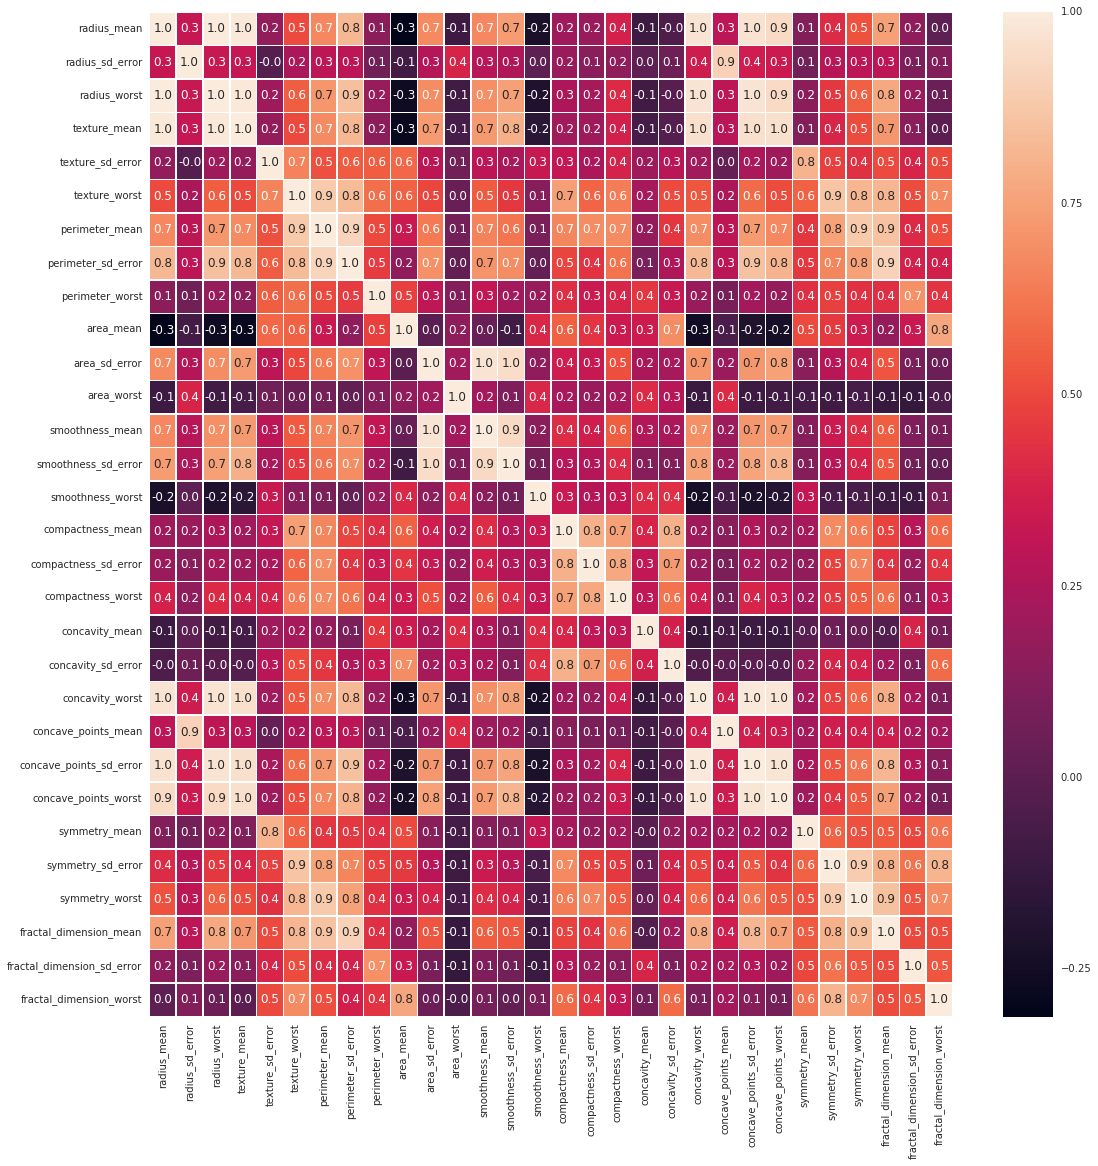

In [194]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

To look into correlation matrix easily, next 3 plots are grouped by Mean, SD_Error and Worst 

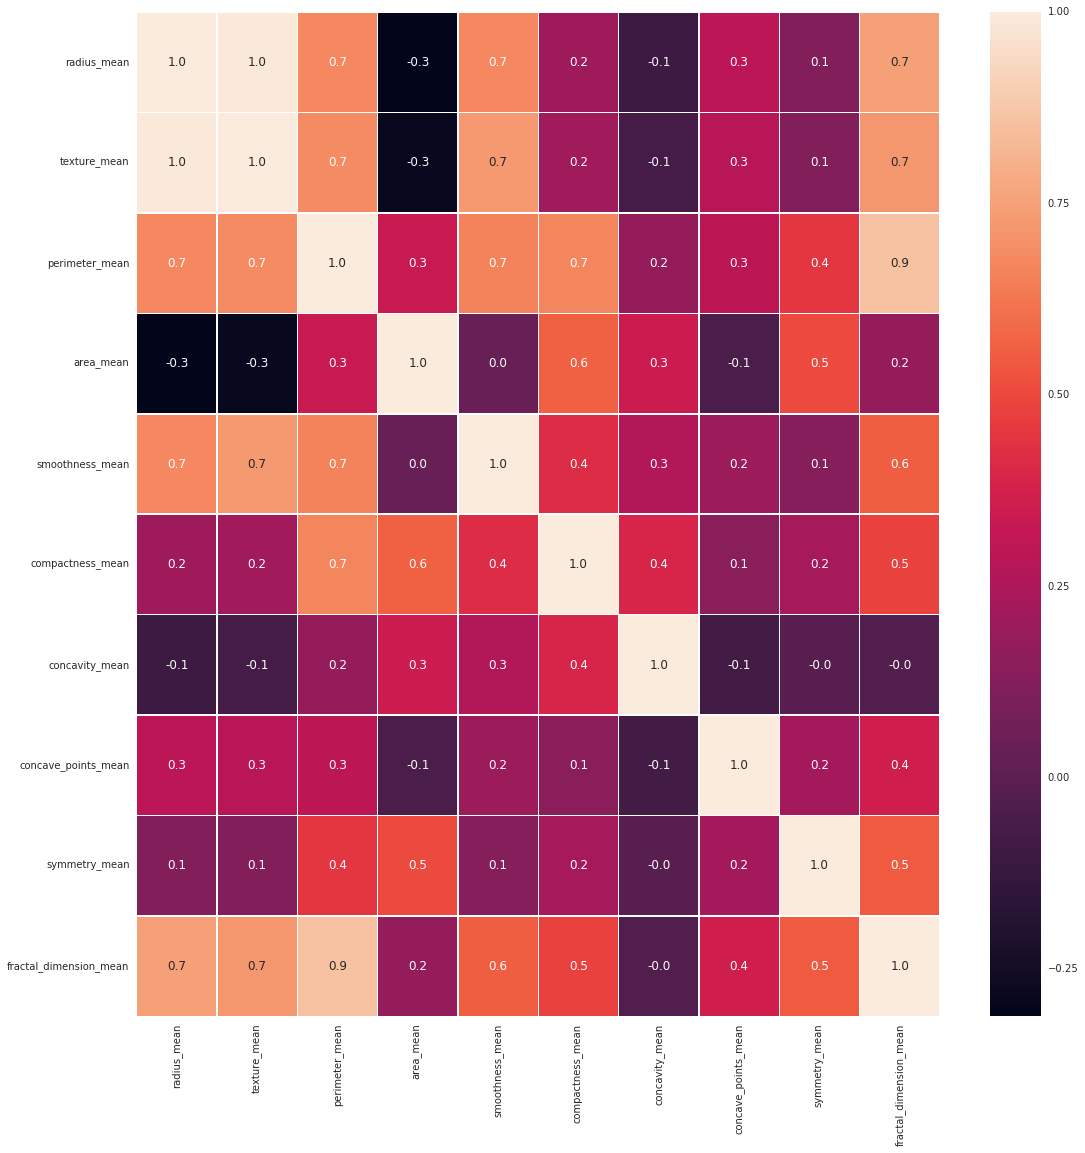

In [193]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x[mean_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

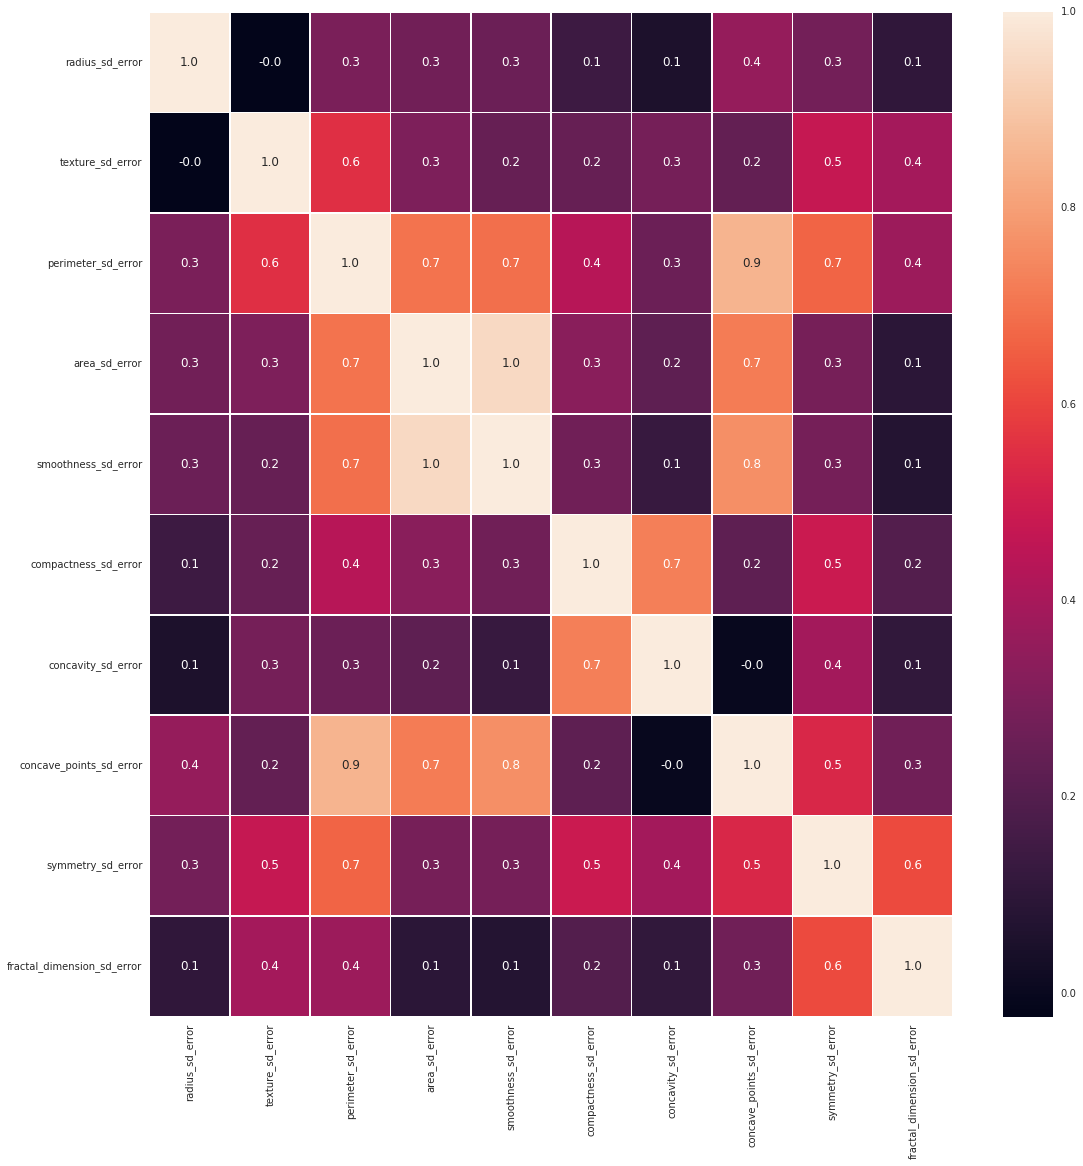

In [195]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x[sd_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

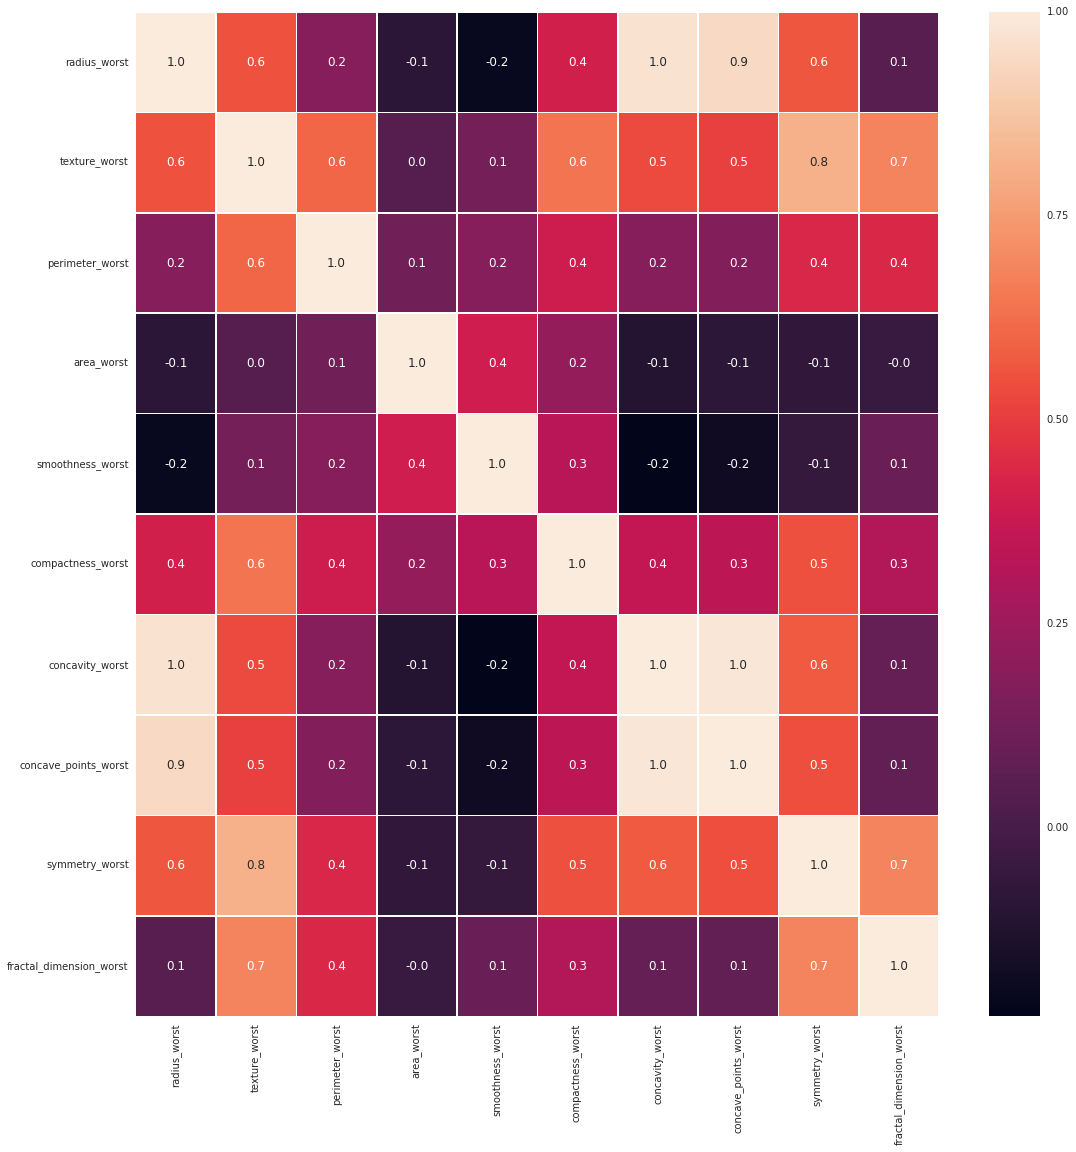

In [196]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x[worst_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h1>Feature Selection and Classification</h1>

In this Section, we will use 2 feature selection techniques and will test them with 2 Classifiers.

Following Feature Selection Techniques will be used:
    1. Feature Selection by using correlation Heatmap
    2. Univariate feature selection
In Classifications, we will use following 2 Techniques to train our model and predict:
    1. Random Forest
    2. Support Vector Machine

<h2>1. Feature Selection by using Correlation Heatmap</h2>
As it can be seen in map heat figure radius_mean, radius_worst, texture_mean, and concavity_worst are correlated with each others so we will use only concavity_worst. If you ask how I choose concavity_worst as a feature to use, well actually there is no correct answer, I just look at swarm plots and concavity_worst looks like clear for me. We cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

The area_sd_error & smoothness_sd_error, perimeter_sd_error, concave_points_sd_error, concave_points_worst, texture_worst, symmetry_worst are few other highly correlated variables.


In [232]:
drop_list1 = [
    'radius_mean', 'radius_worst', 'texture_mean', 'concavity_worst',
    'area_sd_error', 'smoothness_sd_error', 'perimeter_sd_error',
    'concave_points_sd_error', 'concave_points_worst', 'texture_worst', 'symmetry_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,radius_sd_error,texture_sd_error,perimeter_mean,perimeter_worst,area_mean,area_worst,smoothness_mean,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concave_points_mean,symmetry_mean,symmetry_sd_error,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,10.38,0.11840,0.3001,0.2419,0.07871,0.9053,8.589,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.2654,0.4601,0.11890
1,17.77,0.08474,0.0869,0.1812,0.05667,0.7339,3.398,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.1860,0.2750,0.08902
2,21.25,0.10960,0.1974,0.2069,0.05999,0.7869,4.585,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.2430,0.3613,0.08758
3,20.38,0.14250,0.2414,0.2597,0.09744,1.1560,3.445,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.2575,0.6638,0.17300
4,14.34,0.10030,0.1980,0.1809,0.05883,0.7813,5.438,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.1625,0.2364,0.07678


Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.
<h2>1.1 Random Forest Classification</h2>

Random Forsest Accuracy is Training Data:  0.989949748744


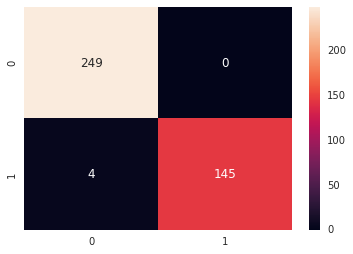

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_train,clf_rf.predict(x_train))
print('Random Forsest Accuracy is Training Data: ',ac)
cm = confusion_matrix(y_train,clf_rf.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")


Random Forsest Accuracy on Test Data:  0.93567251462


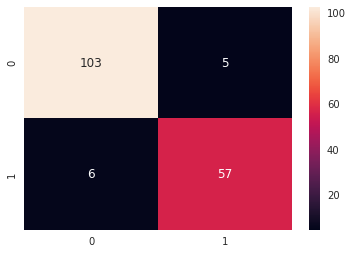

In [256]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Random Forsest Accuracy on Test Data: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

The accuracy on Training Data is 98.9% and 93.5% on Test Data. We can see in confusion matrix that it has made few wrong predictions. Not bad, right!...

<h2>About the Overfit</h2>

Moreover, Accuracy gap between training and testing dataset is not wide, so <b> our model isn't overfitting</b>. <br>
If our model does much better on the training set than on the test set, then we’re likely overfitting. For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set.

There are few techniques which helps to prevent Overfitting:
1. Cross-validation: In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”)..
2. Train with more data:It won’t work everytime, but training with more data can help algorithms detect the signal better. Of course, that’s not always the case. If we just add more noisy data, this technique won’t help.
3. Remove features: Some algorithms have built-in feature selection. For those that don’t, we can manually improve their generalizability by removing irrelevant input features.
4. Early stopping: When we are training a learning algorithm iteratively, we can measure how well each iteration of the model performs. Up until a certain number of iterations, new iterations improve the model. After that point, however, the model’s ability to generalize can weaken as it begins to overfit the training data. Early stopping refers stopping the training process before the learner passes that point.
5. Regularization: Regularization refers to a broad range of techniques for artificially forcing your model to be simpler. The method will depend on the type of learner you’re using. For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression. Oftentimes, the regularization method is a hyperparameter as well, which means it can be tuned through cross-validation. 
6. Ensembling: Ensembles are machine learning methods for combining predictions from multiple separate models

Lets test these features with SVM classifier.
<h2>1.2 Support Vector Machine Classification</h2>

Support Vector Machine Accuracy is:  0.888888888889


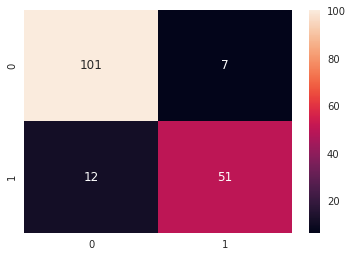

In [258]:
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

model = svm.SVC()
model.fit(x_train,y_train)
#prediction=model.predict(x_test)
#metrics.accuracy_score(prediction,y_test)

ac = accuracy_score(y_test,model.predict(x_test))
print('Support Vector Machine Accuracy is: ',ac)
cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 88.8%, not good as compare to Random Forest model.

Now, lets test other feature selection methods if we could find better results.

By considering the correlation matrix we can select our desired feature set for the model, but machine learning domain is also equipped with few feature selection algorithms to extract/compute  best feature set for our model. Here, we will test one of them:

<h2>2. Univariate Feature Selection</h2>
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only try. We will not try all combinations but only choose k = 5 and find best 5 features for now.


In [259]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


Score list: [  1.77946492e+02   6.06916433e+01   1.34061092e+03   3.66899557e+04
   1.00015175e-01   3.41839493e+00   1.30547650e+01   7.09766457e+00
   1.95982847e-01   3.42575072e-04   2.45882967e+01   4.07131026e-02
   1.72696840e+02   6.12741067e+03   1.32470372e-03   3.74071521e-01
   6.92896719e-01   2.01587194e-01   1.39557806e-03   2.65927071e-03
   3.25782599e+02   1.16958562e+02   2.40512835e+03   7.50217341e+04
   2.63226314e-01   1.19077581e+01   2.58858117e+01   8.90751003e+00
   1.00635138e+00   1.23087347e-01]
Feature list: Index(['radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean',
       'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_point

The Top scored features are <b>fractal_dimension_mean, concave_points_worst, perimeter_sd_error, compactness_sd_error, and smoothness_sd_error</b>. 

Let's build model on top of these 5 features.

<h2>2.1 Random Forest Classification</h2>

Random Forsest Accuracy is:  0.970760233918


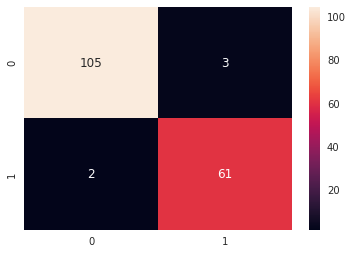

In [260]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(n_estimators=100)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Random Forsest Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

These top 5 features are play significant role in the data set. Accuracy is 97% and as it can be seen in confusion matrix, we have few wrong predictions. If we set 
n_estimators=10 (default), then accuracy is 95%  
n_estimators=50, then accuracy is 96%  

So, <b>we also need to spend a good time just for Model Tuning</b>. 

<h2>2.2 Suport Vector Machine</h2>

Support Vector Machine Accuracy is:  0.631578947368


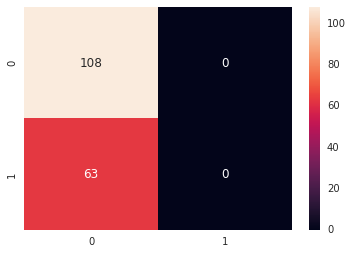

In [261]:
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

model = svm.SVC()
model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Support Vector Machine Accuracy is: ',ac)
cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

SVM Accuracy is 63%, which is worst in contrast to all three models. 

Let's do the little model tuning to gain some good accuracey. 

Support Vector Machine Accuracy is:  0.964912280702


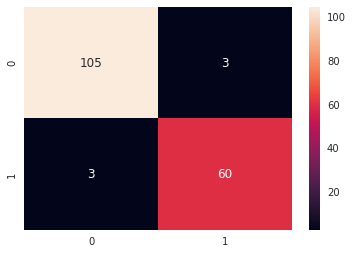

In [262]:
model = svm.SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Support Vector Machine Accuracy is: ',ac)
cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

So now, SVM Accuracy is 96.4%,

<h1>Explanation To Technical Audiences</h1>
<h2>Limitations of analysis and identify possible further steps </h2>

My current analysis if limited to 2 feature selection and classification techniques. I would like to spend more time on feature selection techniques and
wanted to explore the following:
    1. Recursive feature elimination (RFE)
    2. Recursive feature elimination with cross validation (RFECV)
    3. Tree based feature selection
I would like to spend time on feature engineering(new feature extraction), like Principal Component Analysis (PCA) which could play significant role in the model.
Also, I would to spend time on models parameters tuning.

<h1>Explanation To Non-Technical Audiences</h1>
<h2>1. Short summary of analysis, explaining how model works and how it performs</h2>

The data is almost normally distributed and it's not skewed. 37% of variables are highly correlated and have similar affect on data. If we drop them, they don't affect our model. Those variables are: radius_mean, radius_worst, texture_mean, concavity_worst, area_sd_error, smoothness_sd_error, perimeter_sd_error, concave_points_sd_error, concave_points_worst, texture_worst, symmetry_worst.

As we have tested 2 models with 2 feature selection techniques and Random Forest worked best with SelectKBest feature selection in our case. We will use this as our final model. 
Our selected model is an ensembling model of Decision tres. <b>Decision tree model works in 0's and 1's if condition satisfies</b>.
In random forest, we can see it from its name, which is to create a forest by some way and make it random. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. 
The difference between Random Forest algorithm and the decision tree algorithm is that <b>in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly</b>.

The data is divided into training(70%) and testing(30%) and Random forest model scored well with the testing dataset.

<h2>2. Factors that contributed to malignant vs benign tumor identification</h2>

Feature selection for the model, one machine learning algorithm SelectKBest helps us to identified 5 most significant variables of the data.<br>
       <ul>  1. fractal_dimension_mean </ul>
       <ul>  2. concave_points_worst </ul>
       <ul>  3. perimeter_sd_error </ul>
       <ul>  4. compactness_sd_error </ul>
       <ul>  5. smoothness_sd_error </ul>

In terms of model, Random forest has worked best as compare to SVM and achieved 97% accuracy based on top 5 significant variables that contributed to malignant vs benign tumor identification..

